### Student Information
Name: 郭芝伶 Alicia Kurniawan

Student ID: 108006206

GitHub ID: https://github.com/aliciakurniawan

---

### Instructions

1. First: do the **take home** exercises in the [DM2022-Lab1-Master](https://github.com/keziatamus/DM2022-Lab1-Master). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2022-Lab1-Master](https://github.com/keziatamus/DM2022-Lab1-Master) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The dataset contains a `sentence` and `score` label. Read the specificiations of the dataset for details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/keziatamus/DM2022-Lab1-Homework/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 20th 11:59 pm, Thursday)__. 

In [164]:
### Begin Assignment Here

# TEST necessary for when working with external scripts
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## 1. The Data
This section contains: importing the data.

In [165]:
# Import data
import numpy as np
pathname = './sentiment labelled sentences/'
data_imdb = np.loadtxt(pathname+'imdb_labelled.txt', delimiter='  \t', dtype=str)
data_yelp = np.loadtxt(pathname+'yelp_labelled.txt', delimiter='\t', dtype=str)
data_amzn = np.loadtxt(pathname+'amazon_cells_labelled.txt', delimiter='\t', dtype=str)

# Combine whole data into one
data = np.append(data_imdb, data_yelp, axis=0)
data = np.append(data, data_amzn, axis=0)

## 2. Data Preparation
This section contains: creating labels for the data.

In [166]:
categories = ['sentence', 'score']

## 3. Data Transformation
This section contains: converting the data into a Pandas Dataframe.

In [167]:
# Convert data into pandas dataframe
import pandas as pd

# my functions
import helpers.data_mining_helpers as dmh

# construct dataframe from a list
X = pd.DataFrame.from_records(data, columns= categories)
X

,sentence,score
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1
...,...,...
2994,The screen does get smudged easily because it ...,0
2995,What a piece of junk.. I lose more calls on th...,0
2996,Item Does Not Match Picture.,0
2997,The only thing that disappoint me is the infra...,0


In [168]:
# Querying the data
X[X.score == '1'][:10] # First 10 positive sentences

,sentence,score
4,The best scene in the movie was when Gerardo i...,1
7,Saw the movie today and thought it was a good ...,1
9,Loved the casting of Jimmy Buffet as the scien...,1
10,And those baby owls were adorable.,1
11,The movie showed a lot of Florida at it's best...,1
12,The Songs Were The Best And The Muppets Were S...,1
13,It Was So Cool.,1
14,"This is a very ""right on case"" movie that deli...",1
16,"This review is long overdue, since I consider ...",1
17,I'll put this gem up against any movie in term...,1


In [169]:
# Querying how many negative sentences in the dataset?
len(X[X.score == '0']) 

1500

## 4. Data Mining using Pandas
This section contains: check for missing values.

In [170]:
# Checking null values. None found. Great~
X.isnull().apply(lambda x: dmh.check_missing_values(x))

,sentence,score
0,The amount of missing records is:,The amount of missing records is:
1,0,0


## 5. Data Preprocessing
This section contains: sampling, using matplotlib, feature creation.

### 5.1 Sampling

In [171]:
# Sampling
X_sample = X.sample(n=1000)
X_sample[:10]

,sentence,score
252,The soundtrack sucked.,0
2256,"The cable looks so thin and flimsy, it is scary.",0
2430,Fantastic earphones.,1
2706,So anyone near you will hear part of your conv...,0
234,Do not waste your time.,0
604,"To be honest with you, this is unbelievable no...",0
2220,Freezes frequently4.,0
2342,A PIECE OF JUNK THAT BROKE AFTER BEING ON MY P...,0
2884,"When it opens, the battery connection is broke...",0
1443,Nothing special.,0


1    513
0    487
Name: score, dtype: int64


<AxesSubplot:title={'center':'Score distribution'}>

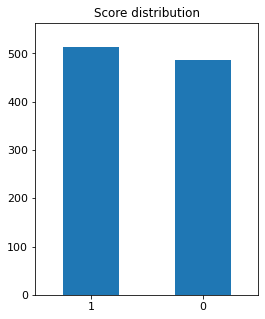

In [172]:
# Import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

print(X_sample.score.value_counts())

# plot barchart for X_sample
ymax = X_sample.score.value_counts().max()
X_sample.score.value_counts().plot(kind = 'bar',
                                    title = 'Score distribution',
                                    ylim = [0, ymax + 50],        
                                    rot = 0, fontsize = 11, figsize = (4,5))

#It's kind of difficult to see...

### 5.2 Feature Creation


In [173]:
# Feature creation using nltk
import nltk

# Make unigrams
X['unigrams'] = X['sentence'].apply(lambda x: dmh.tokenize_text(x))
X['unigrams'][:10]

0    [A, very, ,, very, ,, very, slow-moving, ,, ai...
1    [Not, sure, who, was, more, lost, -, the, flat...
2    [Attempting, artiness, with, black, &, white, ...
3    [Very, little, music, or, anything, to, speak,...
4    [The, best, scene, in, the, movie, was, when, ...
5    [The, rest, of, the, movie, lacks, art, ,, cha...
6                              [Wasted, two, hours, .]
7    [Saw, the, movie, today, and, thought, it, was...
8                             [A, bit, predictable, .]
9    [Loved, the, casting, of, Jimmy, Buffet, as, t...
Name: unigrams, dtype: object

In [174]:
#Check if the new feature was created. Yup!
X.head()

,sentence,score,unigrams
0,"A very, very, very slow-moving, aimless movie ...",0,"[A, very, ,, very, ,, very, slow-moving, ,, ai..."
1,Not sure who was more lost - the flat characte...,0,"[Not, sure, who, was, more, lost, -, the, flat..."
2,Attempting artiness with black & white and cle...,0,"[Attempting, artiness, with, black, &, white, ..."
3,Very little music or anything to speak of.,0,"[Very, little, music, or, anything, to, speak,..."
4,The best scene in the movie was when Gerardo i...,1,"[The, best, scene, in, the, movie, was, when, ..."


To make it easier to identify where the data is from, I created

In [175]:
X['remark']=X['score'].apply(lambda x: dmh.pos_neg(x))
X

,sentence,score,unigrams,remark
0,"A very, very, very slow-moving, aimless movie ...",0,"[A, very, ,, very, ,, very, slow-moving, ,, ai...",negative
1,Not sure who was more lost - the flat characte...,0,"[Not, sure, who, was, more, lost, -, the, flat...",negative
2,Attempting artiness with black & white and cle...,0,"[Attempting, artiness, with, black, &, white, ...",negative
3,Very little music or anything to speak of.,0,"[Very, little, music, or, anything, to, speak,...",negative
4,The best scene in the movie was when Gerardo i...,1,"[The, best, scene, in, the, movie, was, when, ...",positive
...,...,...,...,...
2994,The screen does get smudged easily because it ...,0,"[The, screen, does, get, smudged, easily, beca...",negative
2995,What a piece of junk.. I lose more calls on th...,0,"[What, a, piece, of, junk, .., I, lose, more, ...",negative
2996,Item Does Not Match Picture.,0,"[Item, Does, Not, Match, Picture, .]",negative
2997,The only thing that disappoint me is the infra...,0,"[The, only, thing, that, disappoint, me, is, t...",negative


### 5.3 Feature Subset Selection

In [176]:
from sklearn.feature_extraction.text import CountVectorizer

# Use the count vectorizer
count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.sentence) #learn the vocabulary and return document-term matrix
print(X_counts[0])

  (0, 4890)	3
  (0, 4133)	1
  (0, 2956)	1
  (0, 166)	1
  (0, 2954)	1
  (0, 75)	1
  (0, 1331)	1
  (0, 1401)	1
  (0, 5139)	1
  (0, 2764)	1


In [177]:
# Use an analyzer
analyze = count_vect.build_analyzer()
analyze(X.loc[1,'sentence'])

['not',
 'sure',
 'who',
 'was',
 'more',
 'lost',
 'the',
 'flat',
 'characters',
 'or',
 'the',
 'audience',
 'nearly',
 'half',
 'of',
 'whom',
 'walked',
 'out']

In [178]:
X_counts.shape

(2999, 5155)

In [179]:
count_vect.get_feature_names_out()[0:10]

array(['00', '10', '100', '11', '12', '13', '15', '15g', '15pm', '17'],
      dtype=object)

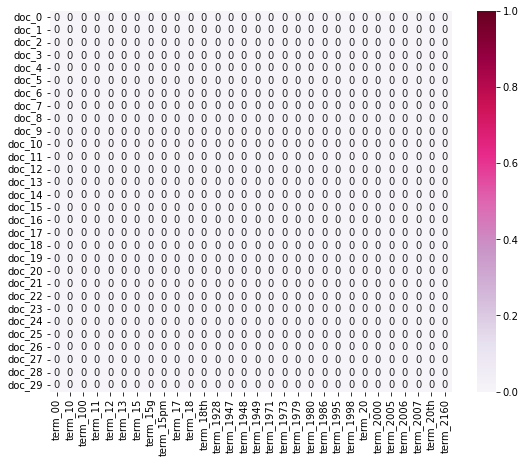

In [180]:
# Generating heatmap using seaborn
import seaborn as sns

# first twenty features only
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[0:30]]

# obtain document index
plot_y = ["doc_"+ str(i) for i in list(X.index)[0:30]]

plot_z = X_counts[0:30, 0:30].toarray()
plot_z

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

### 5.4 Dimensionality Reduction

In [181]:
from sklearn.decomposition import PCA

In [182]:
X_reduced = PCA(n_components = 2).fit_transform(X_counts.toarray())

In [183]:
X_reduced.shape

(2999, 2)

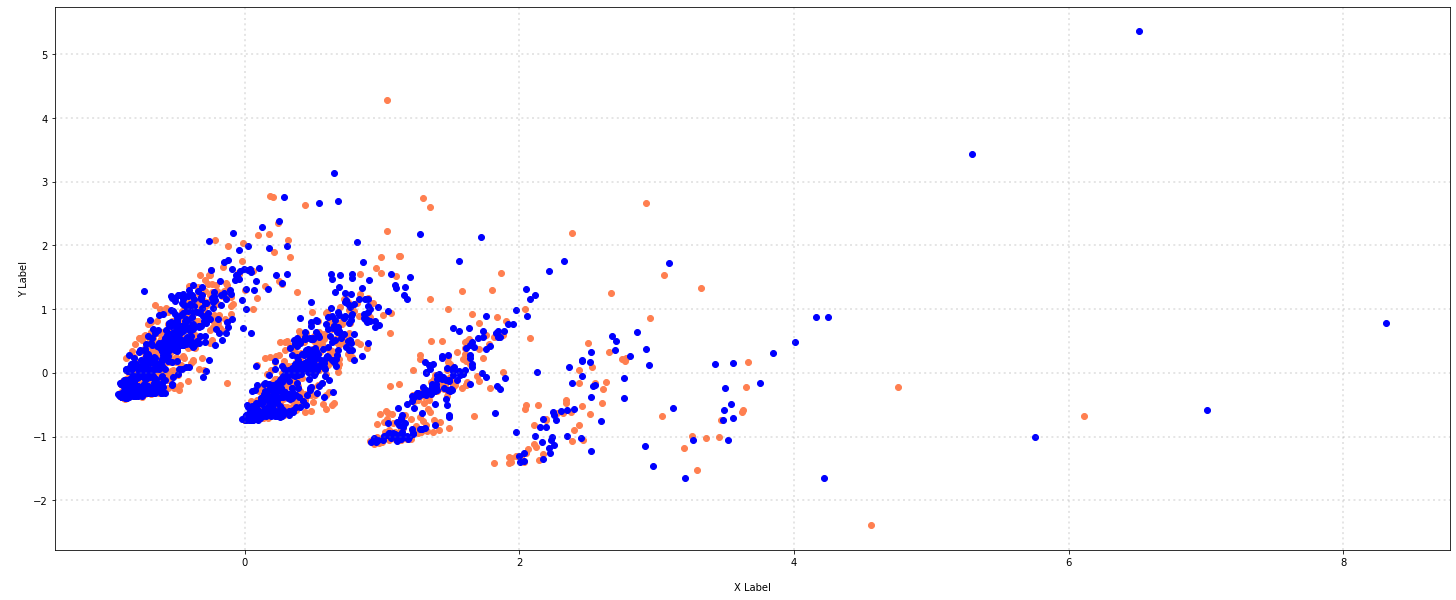

In [184]:
col = ['coral', 'blue', 'black', 'orange']
score = ['0','1']

# plot
fig = plt.figure(figsize = (25,10))
ax = fig.subplots()

for c, category in zip(col, score):
    xs = X_reduced[X['score'] == category].T[0]
    ys = X_reduced[X['score'] == category].T[1]
   
    ax.scatter(xs, ys, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')

plt.show()

### 5.5 Attribute Transformation / Aggregation

In [185]:
# note this takes time to compute. You may want to reduce the amount of terms you want to compute frequencies for
term_frequencies = []
for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))

In [186]:
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

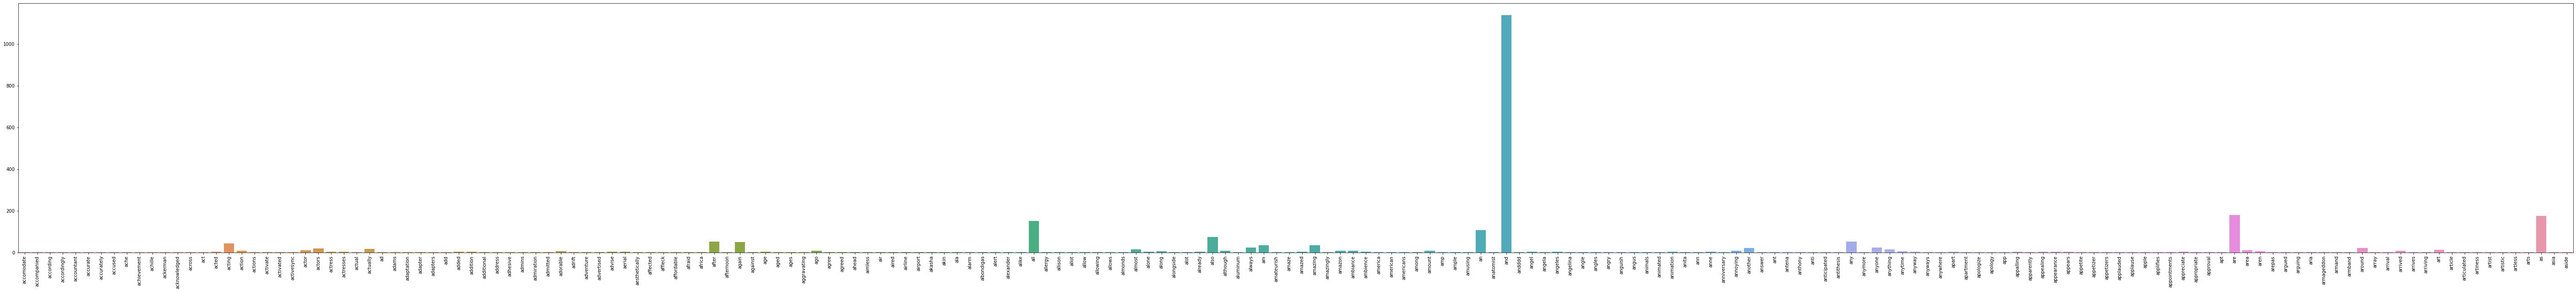

In [200]:
# plot
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[100:300], 
            y=term_frequencies[100:300])
g.set_xticklabels(count_vect.get_feature_names_out()[100:300], rotation = 90);

In [201]:
# Use plotly for interactivity
import plotly.graph_objects as go
fig = go.Figure(
    data=[go.Bar(x=count_vect.get_feature_names_out()[:300], y=term_frequencies[:300])],
    layout_title_text="Word Distribution"
)
fig.show()

In [202]:
# Answer here
x = []

# sort the term frequencies in descending order
sorted_list = np.sort(term_frequencies)[::-1]
sorted_index = np.argsort(term_frequencies)[::-1] #get the indices to get the feature names
print(sorted_list)
print(sorted_list[:20])


top_20 = [count_vect.get_feature_names_out()[sorted_index[:20]]]

# Plot visuals
fig = go.Figure(
    data=[go.Bar(x=top_20, y=sorted_list[:20])],
    layout_title_text="Top 20 Words Most Frequently Used"
)
fig.show()


[1953 1138  787 ...    1    1    1]
[1953 1138  787  753  670  643  624  571  400  336  316  306  274  254
  245  230  222  221  210  201]


### 5.6 Binarization

In [189]:
# Binarization. It isn't really needed because score already consists 0 and 1...

from sklearn import preprocessing, metrics, decomposition, pipeline, dummy
mlb = preprocessing.LabelBinarizer()
mlb.fit(X.score)
X['bin_category'] = mlb.transform(X['score']).tolist()
X

,sentence,score,unigrams,remark,bin_category
0,"A very, very, very slow-moving, aimless movie ...",0,"[A, very, ,, very, ,, very, slow-moving, ,, ai...",negative,[0]
1,Not sure who was more lost - the flat characte...,0,"[Not, sure, who, was, more, lost, -, the, flat...",negative,[0]
2,Attempting artiness with black & white and cle...,0,"[Attempting, artiness, with, black, &, white, ...",negative,[0]
3,Very little music or anything to speak of.,0,"[Very, little, music, or, anything, to, speak,...",negative,[0]
4,The best scene in the movie was when Gerardo i...,1,"[The, best, scene, in, the, movie, was, when, ...",positive,[1]
...,...,...,...,...,...
2994,The screen does get smudged easily because it ...,0,"[The, screen, does, get, smudged, easily, beca...",negative,[0]
2995,What a piece of junk.. I lose more calls on th...,0,"[What, a, piece, of, junk, .., I, lose, more, ...",negative,[0]
2996,Item Does Not Match Picture.,0,"[Item, Does, Not, Match, Picture, .]",negative,[0]
2997,The only thing that disappoint me is the infra...,0,"[The, only, thing, that, disappoint, me, is, t...",negative,[0]
